In [42]:
profiles = read.csv("profiles.csv") 

In [43]:
library(stringr)
essay0_length<-str_length(profiles$essay0)
data<-data.frame(age=profiles$age,essay_length=essay0_length,orientation=profiles$orientation,gender=profiles$sex,sign=profiles$sign,status=profiles$status)

In [44]:
data$sign <- sub("but it doesn&rsquo","",data$sign)
data$sign<-sub("t matter","",data$sign)
data$sign<-sub("and it&rsquo","",data$sign)
data$sign<-sub("s fun to think about","",data$sign)
data$sign<-sub(" ;","",data$sign)
data$sign<-sub(" and is a lot","",data$sign)
data$status<-sub("available","single",data$status)

In [45]:
data$sign=as.factor(data$sign)
data$status=as.factor(data$status)
data<-subset(data,age<=100)
data$age<- cut(data$age, breaks=c(18, 26, 32.34, 37, Inf))

In [46]:
str(data)
head(data)

'data.frame':	59944 obs. of  6 variables:
 $ age         : Factor w/ 4 levels "(18,26]","(26,32.3]",..: 1 3 4 1 2 2 2 2 1 3 ...
 $ essay_length: int  1287 691 1416 41 210 870 198 0 0 575 ...
 $ orientation : Factor w/ 3 levels "bisexual","gay",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ gender      : Factor w/ 2 levels "f","m": 2 2 2 2 2 2 1 1 1 2 ...
 $ sign        : Factor w/ 13 levels "","aquarius",..: 6 4 9 9 2 12 13 10 6 4 ...
 $ status      : Factor w/ 4 levels "married","seeing someone",..: 3 3 3 3 3 3 3 3 3 3 ...


age,essay_length,orientation,gender,sign,status
"(18,26]",1287,straight,m,gemini,single
"(32.3,37]",691,straight,m,cancer,single
"(37,Inf]",1416,straight,m,pisces,single
"(18,26]",41,straight,m,pisces,single
"(26,32.3]",210,straight,m,aquarius,single
"(26,32.3]",870,straight,m,taurus,single


In [23]:
write.csv(data, "profiles_data.csv")

In [24]:
summary(data$essay_length)
summary(data$age)
unique(data$orientation)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   165.0   419.0   616.8   837.0 48850.0 

(18,26] (26,32.3] (32.3,37]  (37,Inf]      NA's 
    17869     19034      8873     13859       309

[1] straight bisexual gay     
Levels: bisexual gay straight

1) do gender and sexual orientation effect number of characters someone writes. 


In [25]:
gaymen<-subset(data,gender=="m"& orientation=="gay")
length(gaymen$gender)
bimen<-subset(data,gender=="m"& orientation=="bisexual")
length(bimen$gender)
straightmen<-subset(data,gender=="m"& orientation=="straight")
length(straightmen$gender)
gaywomen<-subset(data,gender=="f"& orientation=="gay")
length(gaywomen$gender)
biwomen<-subset(data,gender=="f"& orientation=="bisexual")
length(biwomen$gender)
straightwomen<-subset(data,gender=="f"& orientation=="straight")
length(straightwomen$gender)

[1] 3985

[1] 771

[1] 31072

[1] 1588

[1] 1996

[1] 20532

In [26]:
gaymensample <- gaymen[sample(1:nrow(gaymen), 771,replace=FALSE),]
bimensample<-bimen[sample(1:nrow(bimen), 771,replace=FALSE),]
straightmensample<-straightmen[sample(1:nrow(straightmen), 771,replace=FALSE),]
gaywomensample<-gaywomen[sample(1:nrow(gaywomen), 771,replace=FALSE),]
biwomensample<-biwomen[sample(1:nrow(biwomen), 771,replace=FALSE),]
straightwomensample<-straightwomen[sample(1:nrow(straightwomen), 771,replace=FALSE),]
gender_orientation<- rbind(gaymensample, bimensample,straightmensample,gaywomensample, biwomensample,straightwomensample)

f    m 
2313 2313

bisexual      gay straight 
    1542     1542     1542

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   192.0   477.0   693.8   921.5 12450.0 

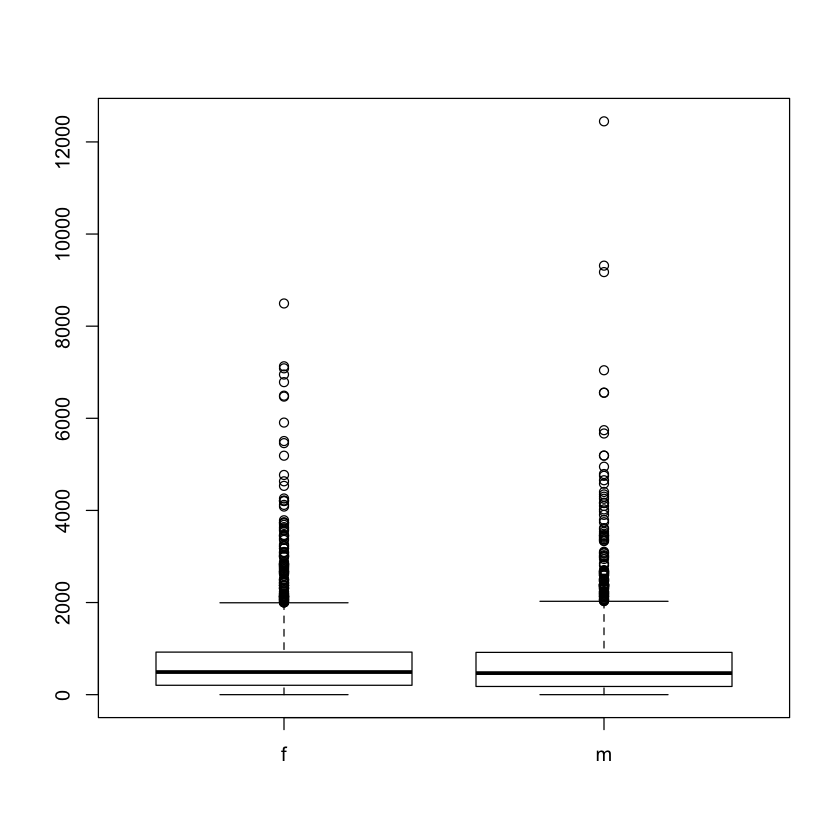

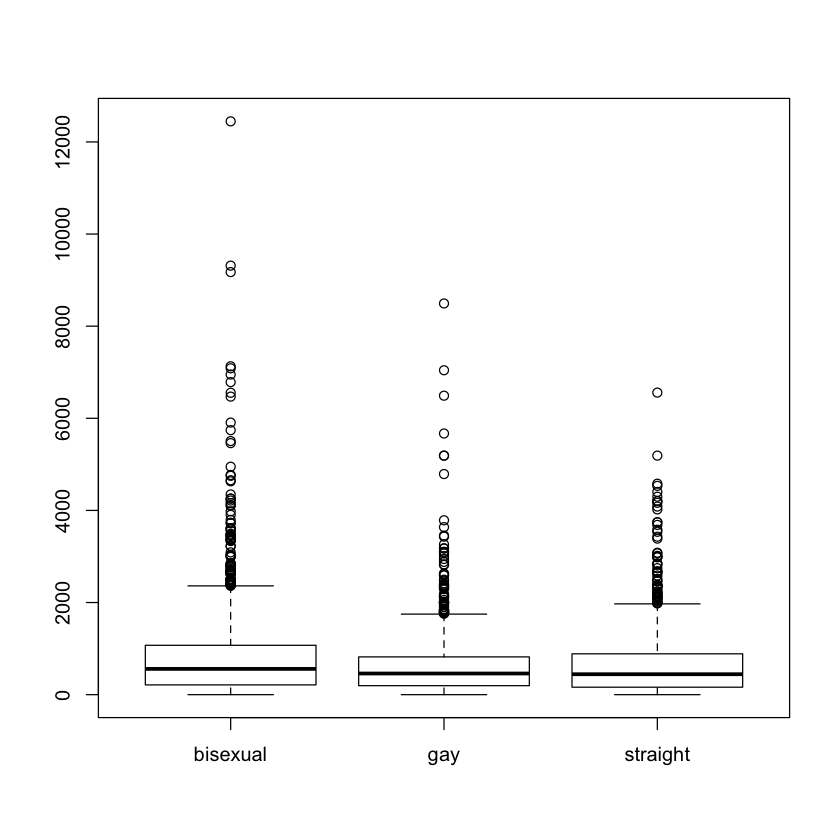

In [27]:
summary(gender_orientation$gender)
summary(gender_orientation$orientation)
summary(gender_orientation$essay_length)
plot(gender_orientation$gender,gender_orientation$essay_length)
plot(gender_orientation$orientation,gender_orientation$essay_length)

In [28]:
fit1<-aov(essay_length~gender*orientation,data=gender_orientation)
summary(fit1)

                     Df    Sum Sq  Mean Sq F value   Pr(>F)    
gender                1 2.526e+05   252560   0.387    0.534    
orientation           2 4.129e+07 20643215  31.631 2.27e-14 ***
gender:orientation    2 8.410e+05   420506   0.644    0.525    
Residuals          4620 3.015e+09   652636                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [29]:
unique(data$age)
unique(data$status)

[1] (18,26]   (32.3,37] (37,Inf]  (26,32.3] <NA>     
Levels: (18,26] (26,32.3] (32.3,37] (37,Inf]

[1] single         seeing someone married        unknown       
Levels: married seeing someone single unknown

2) Does age and relationship status effect the number of characters

In [30]:
age1s<-subset(data,age=="(18,26]"& status=="single")
length(age1s$gender)
age1ss<-subset(data,age=="(18,26]"& status=="seeing someone")
length(age1ss$gender)
age1m<-subset(data,age=="(18,26]"& status=="married")
length(age1m$gender)

age2s<-subset(data,age=="(26,32.3]"& status=="single")
length(age2s$gender)
age2ss<-subset(data,age=="(26,32.3]"& status=="seeing someone")
length(age2ss$gender)
age2m<-subset(data,age=="(26,32.3]"& status=="married")
length(age2m$gender)

age3s<-subset(data,age=="(32.3,37]"& status=="single")
length(age3s$gender)
age3ss<-subset(data,age=="(32.3,37]"& status=="seeing someone")
length(age3ss$gender)
age3m<-subset(data,age=="(32.3,37]"& status=="married")
length(age3m$gender)

age4s<-subset(data,age=="(37,Inf]"& status=="single")
length(age4s$gender)
age4ss<-subset(data,age=="(37,Inf]"& status=="seeing someone")
length(age4ss$gender)
age4m<-subset(data,age=="(37,Inf]"& status=="married")
length(age4m$gender)

[1] 17072

[1] 761

[1] 34

[1] 18138

[1] 796

[1] 98

[1] 8535

[1] 276

[1] 60

[1] 13517

[1] 220

[1] 118

In [31]:
age1s_samp <- age1s[sample(1:nrow(age1s), 34,replace=FALSE),]
age1ss_samp <- age1ss[sample(1:nrow(age1ss), 34,replace=FALSE),]
age1m_samp<- age1m[sample(1:nrow(age1m), 34,replace=FALSE),]

age2s_samp <- age2s[sample(1:nrow(age2s), 34,replace=FALSE),]
age2ss_samp<- age2ss[sample(1:nrow(age2ss), 34,replace=FALSE),]
age2m_samp<- age2m[sample(1:nrow(age2m), 34,replace=FALSE),]

age3s_samp <- age3s[sample(1:nrow(age3s), 34,replace=FALSE),]
age3ss_samp<- age3ss[sample(1:nrow(age3ss), 34,replace=FALSE),]
age3m_samp<- age3m[sample(1:nrow(age3m), 34,replace=FALSE),]

age4s_samp <- age4s[sample(1:nrow(age4s), 34,replace=FALSE),]
age4ss_samp<- age4ss[sample(1:nrow(age4ss), 34,replace=FALSE),]
age4m_samp<- age4m[sample(1:nrow(age4m), 34,replace=FALSE),]

age_status<- rbind(age1s_samp,age1ss_samp,age1m_samp,age2s_samp,age2ss_samp,age2m_samp,
                   age3s_samp,age3ss_samp,age3m_samp,
                   age4s_samp,age4ss_samp,age4m_samp)


(18,26] (26,32.3] (32.3,37]  (37,Inf] 
      102       102       102       102

married seeing someone         single        unknown 
           136            136            136              0

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   193.2   507.5   751.8  1014.0  6592.0 

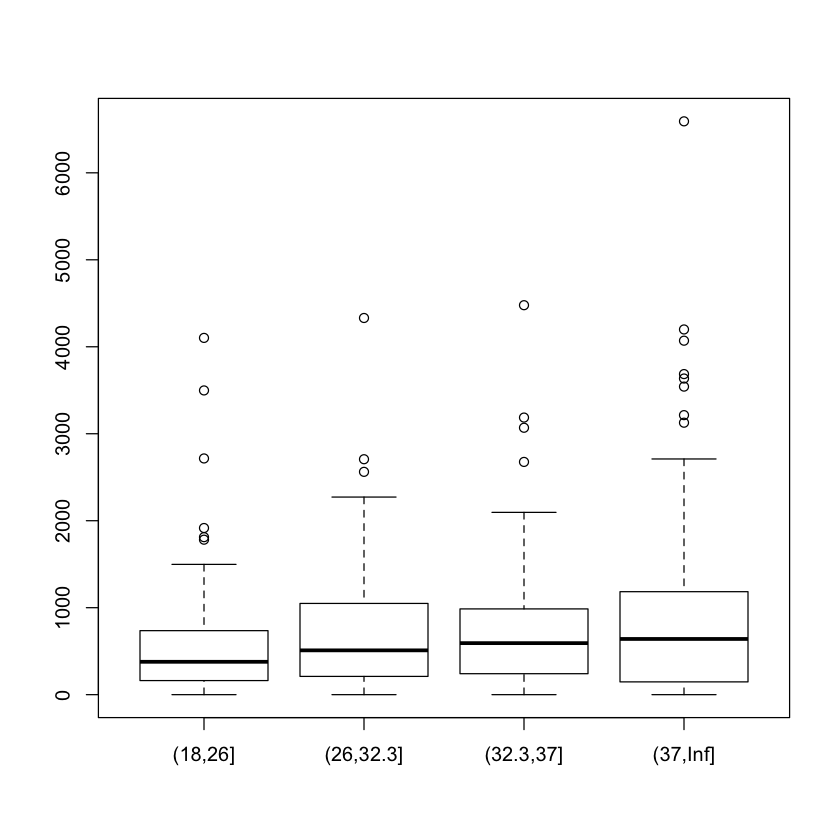

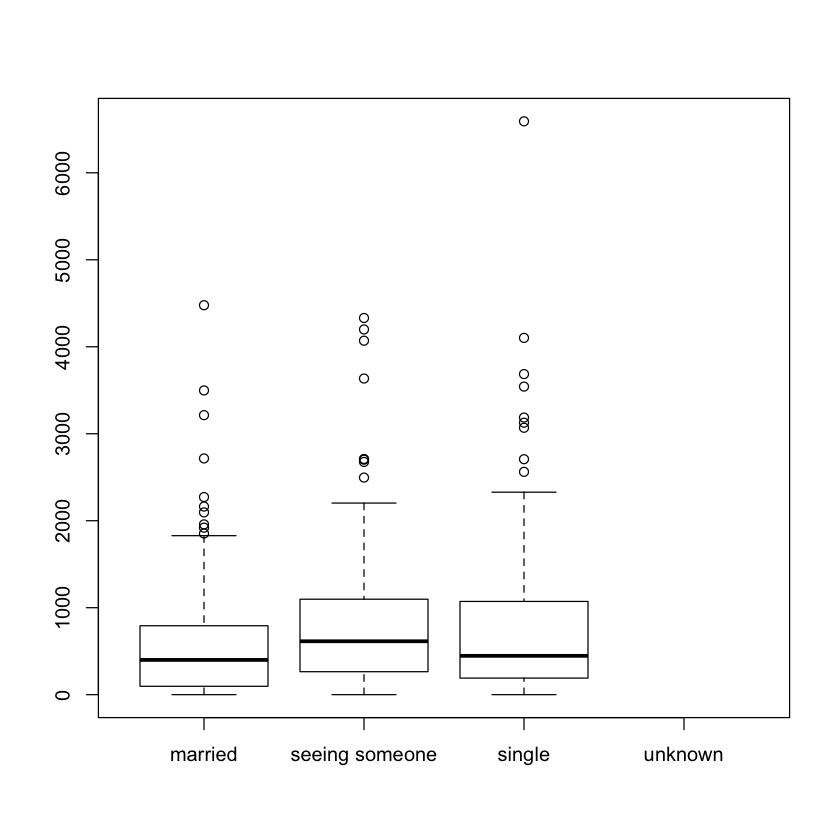

In [32]:
summary(age_status$age)
summary(age_status$status)
summary(age_status$essay_length)
plot(age_status$age,age_status$essay_length)
plot(age_status$status,age_status$essay_length)

In [33]:
fit2<-aov(essay_length~age*status,data=age_status)
summary(fit2)

             Df    Sum Sq Mean Sq F value Pr(>F)  
age           3   7627100 2542367   3.654 0.0127 *
status        2   3561984 1780992   2.559 0.0786 .
age:status    6   8716493 1452749   2.088 0.0537 .
Residuals   396 275551951  695838                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [34]:
unique(data$sign)
table(data$sign)

[1] gemini      cancer      pisces      aquarius    taurus      virgo      
 [7] sagittarius leo                     aries       libra       scorpio    
[13] capricorn  
13 Levels:  aquarius aries cancer capricorn gemini leo libra ... virgo


               aquarius       aries      cancer   capricorn      gemini 
      11055        3927        3989        4206        3573        4310 
        leo       libra      pisces sagittarius     scorpio      taurus 
       4374        4207        3946        3942        4134        4140 
      virgo 
       4141 

In [35]:
gemini<-subset(data,sign=="gemini")
cancer <-subset(data,sign=="cancer")
pisces<-subset(data,sign=="pisces")
aquarius<-subset(data,sign=="aquarius")
taurus<-subset(data,sign=="taurus")
virgo<-subset(data,sign=="virgo")
sagittarius<-subset(data,sign=="sagittarius")
leo<-subset(data,sign=="leo")
aries<-subset(data,sign=="aries")
libra<-subset(data,sign=="libra")
scorpio<-subset(data,sign=="scorpio")
capricorn<-subset(data,sign=="capricorn")
none<-subset(data,sign=="")

In [36]:
gemini_samp <- gemini[sample(1:nrow(gemini), 3500,replace=FALSE),]
cancer_samp <- cancer[sample(1:nrow(cancer), 3500,replace=FALSE),]
pisces_samp <- pisces[sample(1:nrow(pisces), 3500,replace=FALSE),]
aquarius_samp <- aquarius[sample(1:nrow(aquarius), 3500,replace=FALSE),]
taurus_samp <- taurus[sample(1:nrow(taurus), 3500,replace=FALSE),]
virgo_samp <- virgo[sample(1:nrow(virgo), 3500,replace=FALSE),]
sagittarius_samp <- sagittarius[sample(1:nrow(sagittarius), 3500,replace=FALSE),]
leo_samp <- leo[sample(1:nrow(leo), 3500,replace=FALSE),]
aries_samp <- aries[sample(1:nrow(aries), 3500,replace=FALSE),]
libra_samp <- libra[sample(1:nrow(libra), 3500,replace=FALSE),]
scorpio_samp <- scorpio[sample(1:nrow(scorpio), 3500,replace=FALSE),]
capricorn_samp <- capricorn[sample(1:nrow(capricorn), 3500,replace=FALSE),]
none_samp <- none[sample(1:nrow(none), 3500,replace=FALSE),]
sign<- rbind(gemini_samp,cancer_samp,pisces_samp,aquarius_samp,taurus_samp,virgo_samp,
             sagittarius_samp,leo_samp,aries_samp,libra_samp,scorpio_samp,capricorn_samp,none_samp)

aquarius       aries      cancer   capricorn      gemini 
       3500        3500        3500        3500        3500        3500 
        leo       libra      pisces sagittarius     scorpio      taurus 
       3500        3500        3500        3500        3500        3500 
      virgo 
       3500

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   174.0   431.0   629.4   853.0 48850.0 

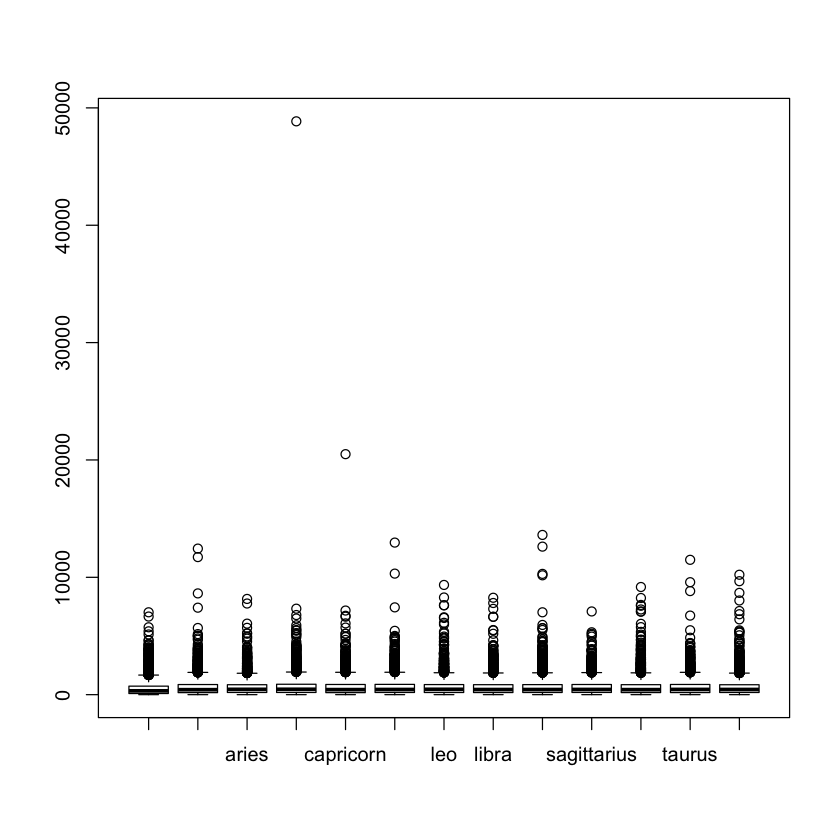

In [37]:
summary(sign$sign)
summary(sign$essay_length)
plot(sign$sign,sign$essay_length)


In [38]:
fit3<-aov(essay_length~sign,data=sign)
summary(fit3)

               Df    Sum Sq Mean Sq F value   Pr(>F)    
sign           12 4.294e+07 3578717   6.375 1.96e-11 ***
Residuals   45487 2.554e+10  561404                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

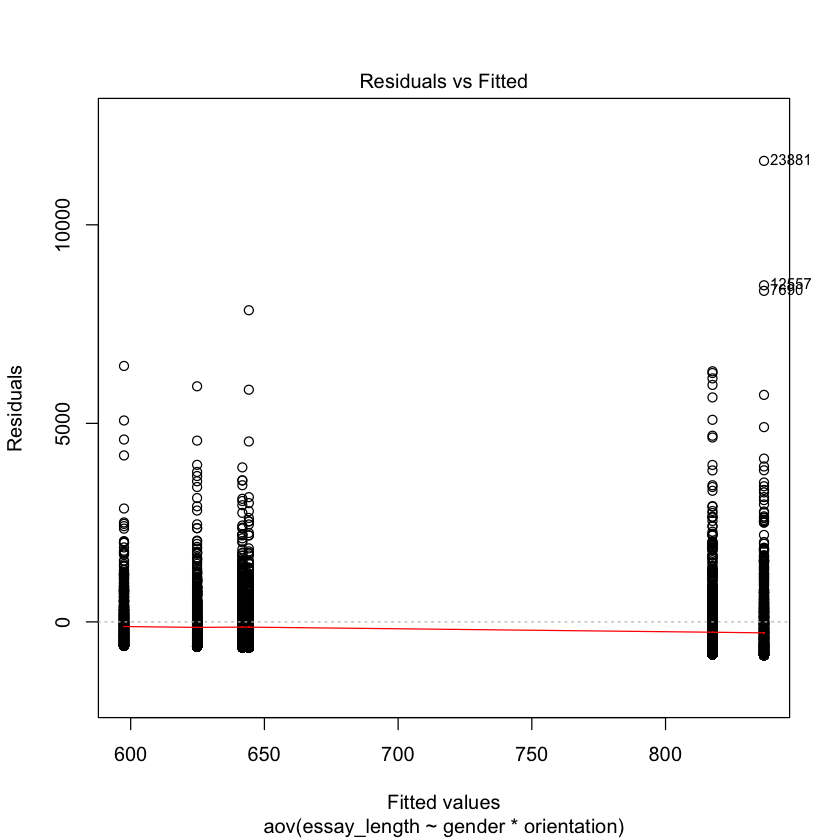

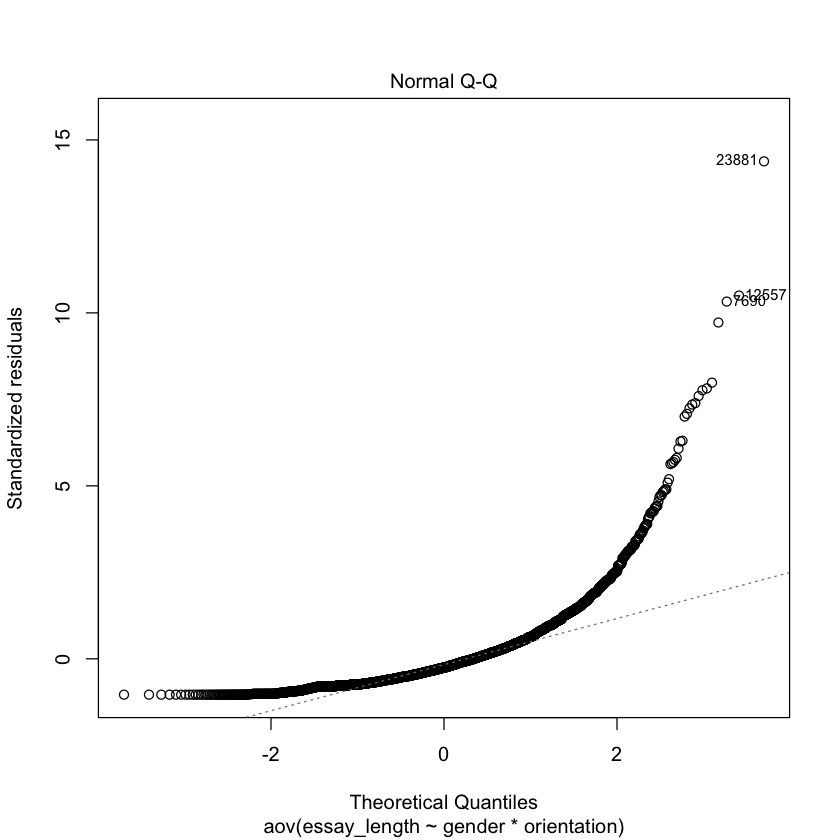

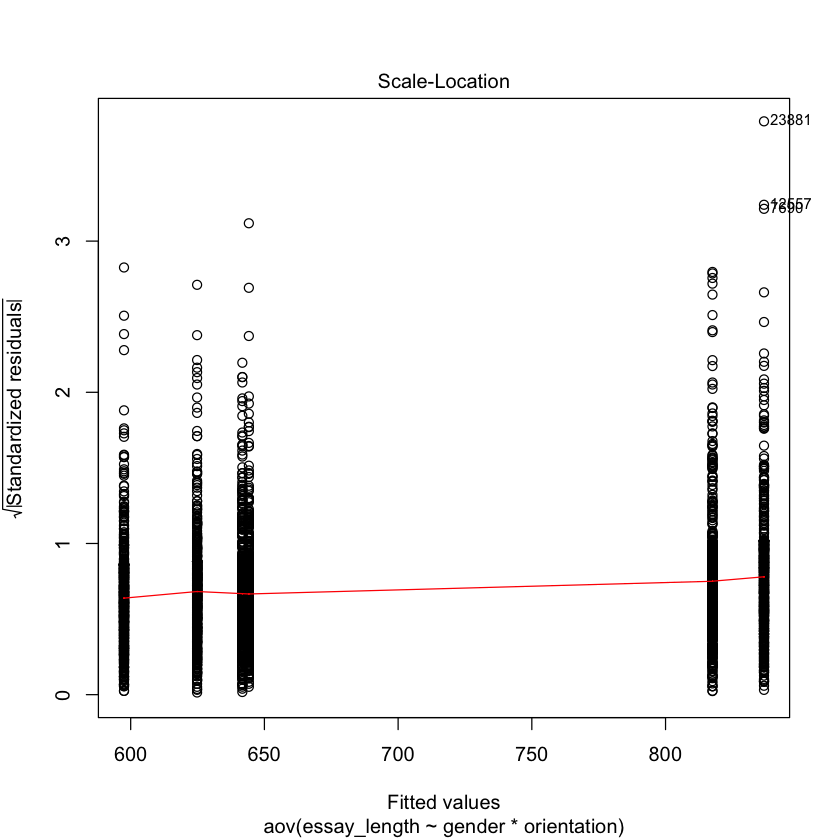

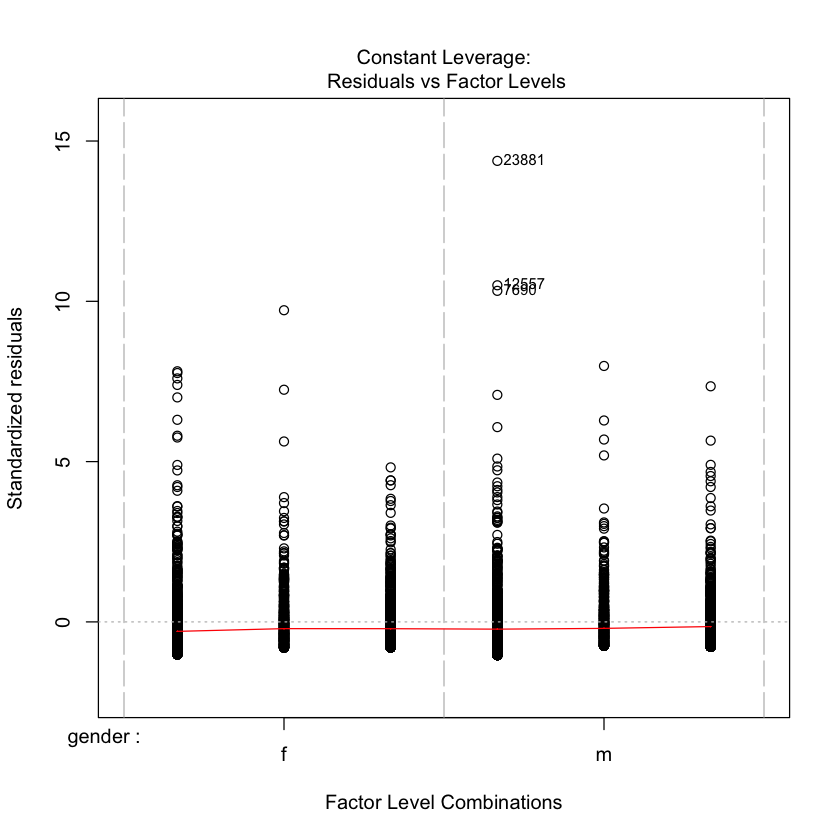

In [39]:
plot(fit1)

In [40]:
write.csv(sign, "profiles_data_sign.csv")
write.csv(age_status, "profiles_data_age_status.csv")
write.csv(gender_orientation, "profiles_data_gender_orientation.csv")

ERROR: Error in summary(essay_length): object 'essay_length' not found
